Vamos a hacer un pequeño ejercicio de inferencia con el modelo ya entrenado

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.jit.load("mnist_model/minicnn_mnist_best.pt", map_location=device)
model.eval()


RecursiveScriptModule(
  original_name=MiniCNN
  (features): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=ReLU)
    (2): RecursiveScriptModule(original_name=MaxPool2d)
    (3): RecursiveScriptModule(original_name=Conv2d)
    (4): RecursiveScriptModule(original_name=ReLU)
    (5): RecursiveScriptModule(original_name=MaxPool2d)
  )
  (classifier): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Flatten)
    (1): RecursiveScriptModule(original_name=Dropout)
    (2): RecursiveScriptModule(original_name=Linear)
    (3): RecursiveScriptModule(original_name=ReLU)
    (4): RecursiveScriptModule(original_name=Dropout)
    (5): RecursiveScriptModule(original_name=Linear)
  )
)

No se pudo abrir inference_test_images/img1.png
No se pudo abrir inference_test_images/img2.png
No se pudo abrir inference_test_images/img3.png
No se pudo abrir inference_test_images/img4.png
No se pudo abrir inference_test_images/img5.png
No se pudo abrir inference_test_images/img6.png


[ WARN:0@5.343] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img1.png'): can't open/read file: check file path/integrity
[ WARN:0@5.344] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img2.png'): can't open/read file: check file path/integrity
[ WARN:0@5.344] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img3.png'): can't open/read file: check file path/integrity
[ WARN:0@5.344] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img4.png'): can't open/read file: check file path/integrity
[ WARN:0@5.344] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img5.png'): can't open/read file: check file path/integrity
[ WARN:0@5.344] global loadsave.cpp:275 findDecoder imread_('inference_test_images/img6.png'): can't open/read file: check file path/integrity


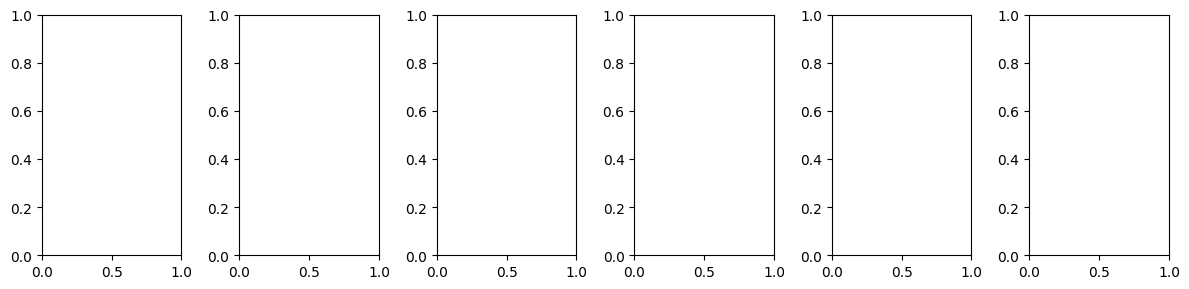

In [ ]:

# lista de tus imágenes
img_paths = [
    "inference_test_imgs/img1.png",
    "inference_test_imgs/img2.png",
    "inference_test_imgs/img3.png",
    "inference_test_imgs/img4.png",
    "inference_test_imgs/img5.png",
    "inference_test_imgs/img6.png",
]

fig, axes = plt.subplots(1, len(img_paths), figsize=(12, 3))

for i, path in enumerate(img_paths):
    # 1. Cargar en escala de grises
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"No se pudo abrir {path}")
        continue

    # 2. Invertir si el fondo es claro
    if np.mean(img) > 127:
        img = cv2.bitwise_not(img)

    # 3. Redimensionar a 28x28
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # 4. Normalizar y convertir a tensor
    img_norm = img.astype(np.float32) / 255.0
    tensor = torch.tensor(img_norm).unsqueeze(0).unsqueeze(0).to(device)

    # 5. Inferencia
    with torch.no_grad():
        logits = model(tensor)
        pred = logits.argmax(dim=1).item()

    # 6. Mostrar
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(f"Pred: {pred}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
